In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
df = pd.read_csv("out.txt", delimiter="\t")

In [16]:
df .head()

,time_stamp,px_state,py_state,v_state,yaw_angle_state,yaw_rate_state,sensor_type,NIS,px_measured,py_measured,px_ground_truth,py_ground_truth,vx_ground_truth,vy_ground_truth
0,1477010443000000,0.312243,0.580340,0.00000,0.000000e+00,0.000000e+00,lidar,1.294452e-321,0.312243,0.580340,0.600000,0.600000,5.19994,0.000000
1,1477010443050000,0.735500,0.629630,7.19993,-2.124170e-17,4.236820e-17,radar,7.476680e+01,0.862916,0.534212,0.859997,0.600045,5.19975,0.001797
2,1477010443100000,1.160500,0.494954,7.20299,-1.272210e-01,-1.185250e-02,lidar,2.211750e-01,1.173850,0.481073,1.119980,0.600225,5.19943,0.005390
3,1477010443150000,1.258080,0.533060,7.18834,1.229050e-01,3.062990e-02,radar,1.824750e+00,0.969149,0.397513,1.379960,0.600629,5.19898,0.010778
4,1477010443200000,1.615750,0.595371,7.20172,1.616470e-01,4.617400e-02,lidar,1.677070e-01,1.650630,0.624690,1.639900,0.601347,5.19839,0.017960


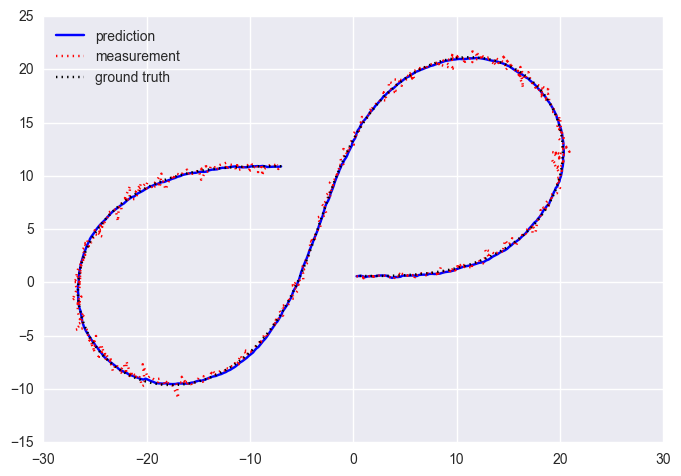

In [17]:
plt.plot(df.px_state, df.py_state, '-b', label='prediction')
plt.plot(df.px_measured, df.py_measured, ':r', label='measurement')
plt.plot(df.px_ground_truth, df.py_ground_truth, ':k', label='ground truth')
plt.legend(loc=0)

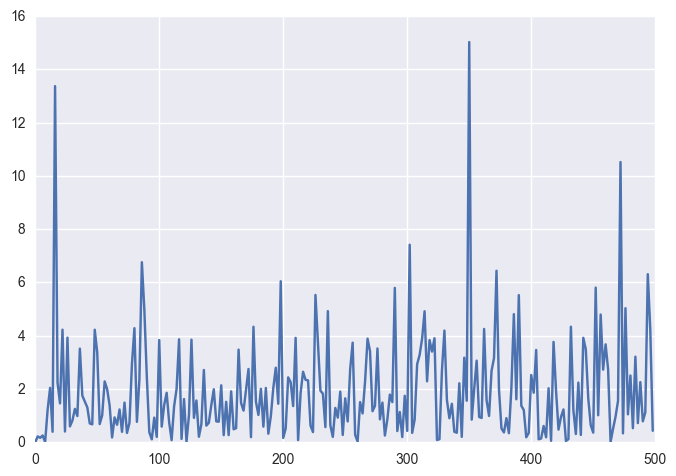

In [18]:
plt.plot (df[df.sensor_type=='lidar'].NIS)

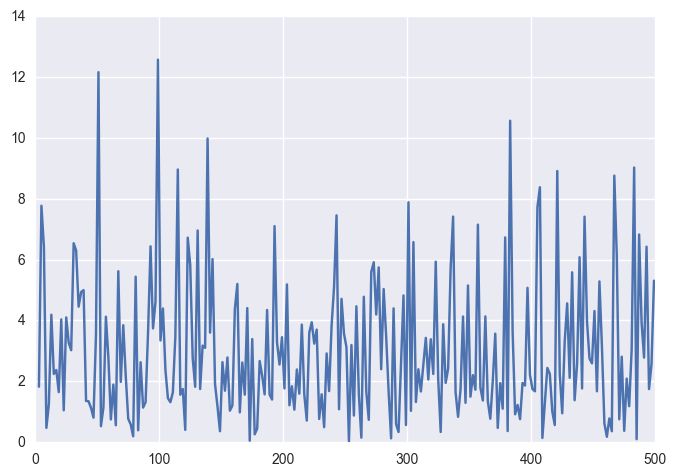

In [20]:
df_rad = df[df.sensor_type=='radar'].NIS
plt.plot (df_rad[df_rad<40])

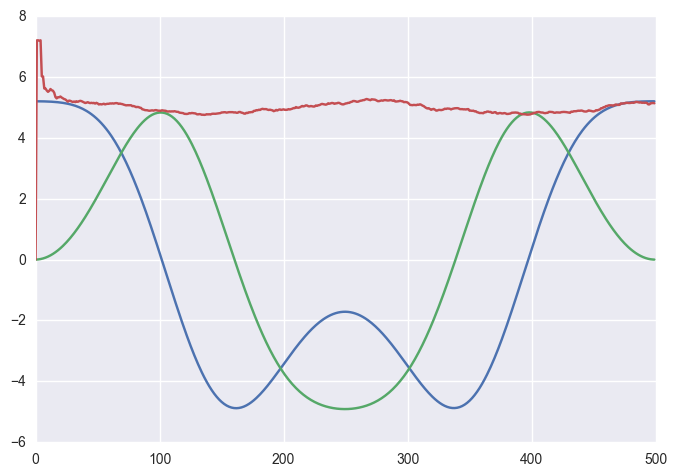

In [23]:
plt.plot (df.vx_ground_truth)
plt.plot (df.vy_ground_truth)
plt.plot (df.v_state)

In [28]:
df_a = df[['time_stamp', 'vx_ground_truth', 'vy_ground_truth']].diff()
df_a.time_stamp = df_a.time_stamp/1000000.0

In [29]:
df_a.head()

,time_stamp,vx_ground_truth,vy_ground_truth
0,NaN,NaN,NaN
1,0.05,-0.00019,0.001797
2,0.05,-0.00032,0.003593
3,0.05,-0.00045,0.005388
4,0.05,-0.00059,0.007182


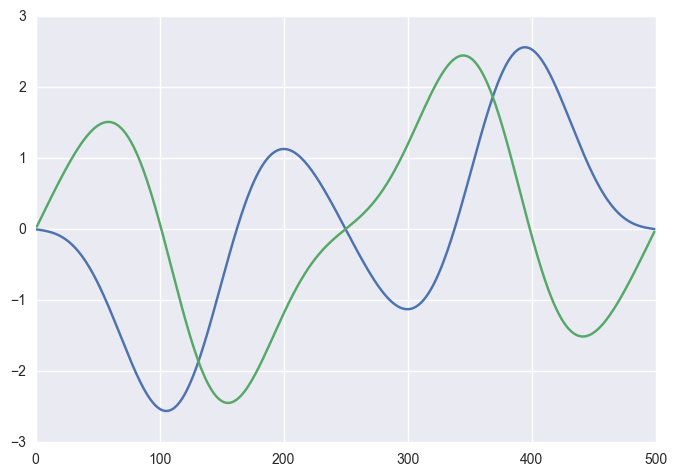

In [31]:
plt.plot(df_a.vx_ground_truth/df_a.time_stamp)
plt.plot(df_a.vy_ground_truth/df_a.time_stamp)

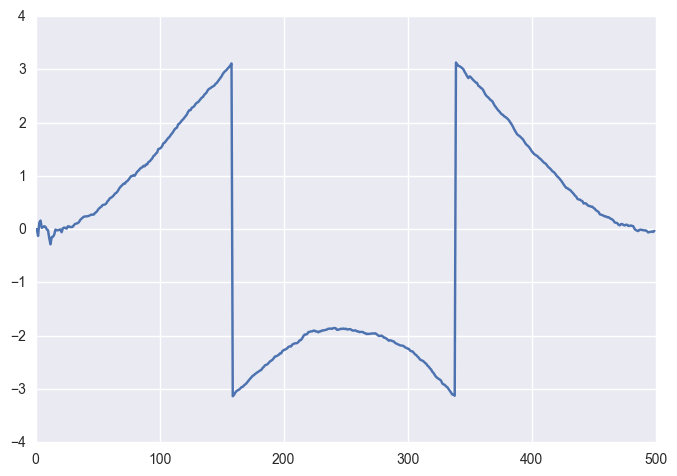

In [32]:
plt.plot(df.yaw_angle_state)

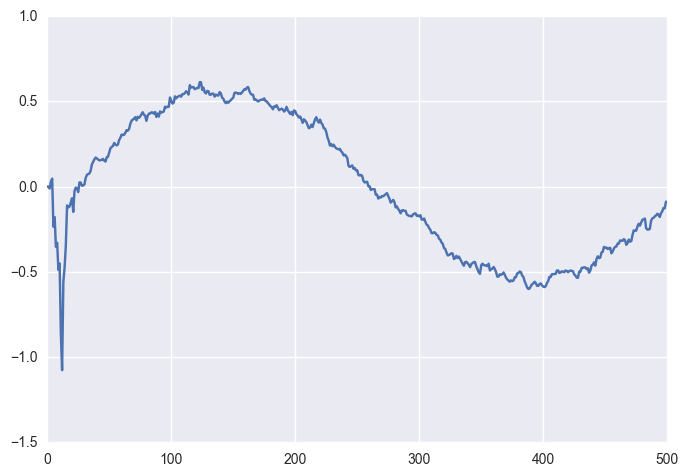

In [33]:
plt.plot (df.yaw_rate_state)